In [1]:
import netCDF4
import numpy as np
import pandas as pd
from osgeo import gdal,osr,ogr
import matplotlib.pyplot as plt

In [2]:
nc_l1 = 'D:\\processing\\netcdf_outliers\\S3A_OL_1_EFR____20191104T135002_20191104T135302_20191124T112554_0179_051_124_3060_MAR_O_NT_002.SEN3'
nc_l2 = 'D:\\processing\\netcdf_outliers\\S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002.SEN3'

In [15]:
B17_l1 = netCDF4.Dataset(nc_l1+'\\Oa17_radiance.nc','r')
B17_l2 = netCDF4.Dataset(nc_l2+'\\Oa17_reflectance.nc','r')
chl_nn = netCDF4.Dataset(nc_l2+'\\chl_nn.nc','r')

In [10]:
B17_l1_data = B17_l1.variables['Oa17_radiance'][:]

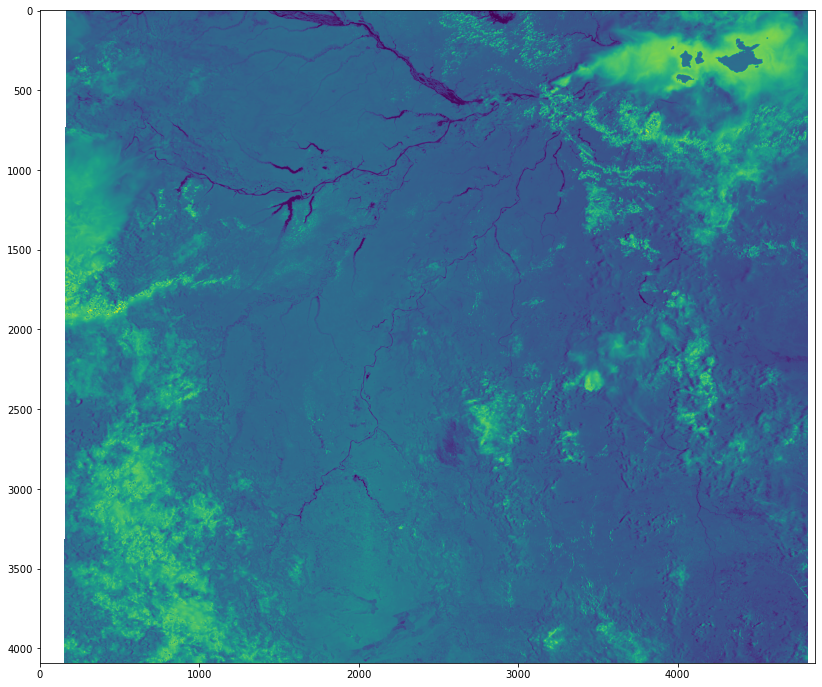

In [20]:
plt.figure(figsize=(16,12))
plt.imshow(B17_l1_data)

In [12]:
B17_l2.variables

OrderedDict([('Oa17_reflectance',
              <class 'netCDF4._netCDF4.Variable'>
              uint16 Oa17_reflectance(rows, columns)
                  _FillValue: 65535
                  add_offset: -0.2
                  long_name: Reflectance for OLCI acquisition band Oa17
                  scale_factor: 1.8311106e-05
              unlimited dimensions: 
              current shape = (4091, 4865)
              filling on),
             ('Oa17_reflectance_err',
              <class 'netCDF4._netCDF4.Variable'>
              uint16 Oa17_reflectance_err(rows, columns)
                  _FillValue: 65535
                  add_offset: -0.2
                  long_name: Error estimates for OLCI acquisition band Oa17
                  scale_factor: 1.8311106e-05
              unlimited dimensions: 
              current shape = (4091, 4865)
              filling on)])

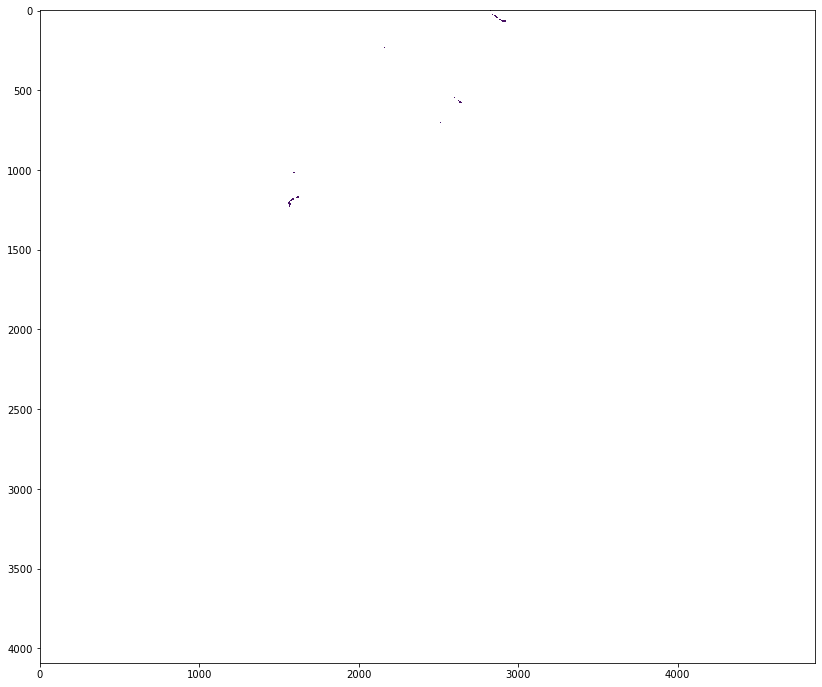

In [21]:
chl_data = chl_nn.variables['CHL_NN'][:]
B17_l2_data = B17_l2.variables['Oa17_reflectance'][:]
plt.figure(figsize=(16,12))
plt.imshow(B17_l2_data)

In [ ]:
# test this:
# https://stackoverflow.com/questions/64228381/sentinel3-olci-chl-average-of-netcdf-files-on-python

In [29]:
your_folder = '/path/to/your/data' 
s3_file = 'S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002_subset.txt'
df = pd.read_csv(os.path.join(your_folder, s3_file), sep='\t', skiprows=1)

In [30]:
df.head(10)

,featureId,Oa01_reflectance:float,Oa01_reflectance_err:float,Oa02_reflectance:float,Oa02_reflectance_err:float,Oa03_reflectance:float,Oa03_reflectance_err:float,Oa04_reflectance:float,Oa04_reflectance_err:float,Oa05_reflectance:float,...,atmospheric_temperature_profile_pressure_level_22:float,atmospheric_temperature_profile_pressure_level_23:float,atmospheric_temperature_profile_pressure_level_24:float,atmospheric_temperature_profile_pressure_level_25:float,horizontal_wind_vector_1:float,horizontal_wind_vector_2:float,humidity:float,sea_level_pressure:float,total_columnar_water_vapour:float,total_ozone:float
0,0,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,246.58904,258.29288,260.20795,260.83896,-0.140184,-0.032727,77.214260,1010.99524,49.837210,0.005812
1,1,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,246.58737,258.29526,260.20440,260.83917,-0.144765,-0.031654,77.207710,1010.99480,49.835526,0.005812
2,2,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,246.58571,258.29764,260.20090,260.83942,-0.149346,-0.030580,77.201170,1010.99445,49.833840,0.005813
3,3,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,246.58405,258.30002,260.19736,260.83963,-0.153927,-0.029507,77.194626,1010.99400,49.832157,0.005813
4,4,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,246.58238,258.30243,260.19385,260.83984,-0.158509,-0.028433,77.188080,1010.99360,49.830470,0.005813
5,5,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,246.58073,258.30480,260.19030,260.84006,-0.163090,-0.027360,77.181540,1010.99316,49.828785,0.005813
6,6,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,246.57907,258.30720,260.18680,260.84027,-0.167671,-0.026286,77.174995,1010.99280,49.827100,0.005813
7,7,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,246.57741,258.30957,260.18326,260.84050,-0.172252,-0.025213,77.168460,1010.99240,49.825413,0.005813
8,8,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,246.57574,258.31195,260.17972,260.84073,-0.176833,-0.024139,77.161910,1010.99194,49.823730,0.005814
9,9,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,...,246.57408,258.31436,260.17620,260.84094,-0.181414,-0.023066,77.155365,1010.99150,49.822044,0.005814


In [39]:
df['WQSF_lsb:double'][0:5]

0    4.294967e+09
1    4.294967e+09
2    4.294967e+09
3    4.294967e+09
4    4.294967e+09
Name: WQSF_lsb:double, dtype: float64

In [40]:
df['WQSF_msb:double'][0:5]

0    4.294967e+09
1    4.294967e+09
2    4.294967e+09
3    4.294967e+09
4    4.294967e+09
Name: WQSF_msb:double, dtype: float64

In [45]:
# first_df = pd.read_csv('D:\\processing\\win\\manacapuru_wfr_ts.csv')
first_df = pd.read_csv('D:\\processing\\win\\manacapuru-ts-v2.csv')

In [46]:
first_df.head()

,Unnamed: 0,Datetime,Date-String,B1-400,B2-412.5,B3-442.5,B4-490,B5-510,B6-560,B7-620,...,B18-885,B21-1020,OAA,OZA,SAA,SZA,A865,T865,T865std,filename
0,0,2019-03-09 14:12:23,20190309T141223,0.030839,0.038494,0.064404,0.096008,0.109961,0.145282,0.171615,...,0.128185,0.112507,-77.578170,22.024783,92.723917,30.511280,0.864849,0.247587,0.200940,S3A_OL_2_WFR____20190309T141223_20190309T14152...
1,1,2019-03-10 13:46:12,20190310T134612,0.023816,0.023729,0.033397,0.048837,0.058514,0.087788,0.108525,...,0.054145,0.040650,102.811689,29.420788,92.100444,36.640366,1.022174,0.228776,0.156703,S3A_OL_2_WFR____20190310T134612_20190310T13491...
2,2,2019-03-13 14:08:38,20190313T140838,0.064504,0.060981,0.063132,0.068284,0.073001,0.088178,0.094815,...,0.127191,0.119418,-77.520494,15.491175,89.710749,31.082482,0.637856,0.161357,0.158318,S3A_OL_2_WFR____20190313T140838_20190313T14113...
3,3,2019-03-14 13:42:27,20190314T134227,0.014856,0.015891,0.024210,0.040481,0.049811,0.077176,0.096964,...,0.048956,0.036232,102.875920,34.914757,89.643484,37.217075,0.766055,0.231757,0.169952,S3A_OL_2_WFR____20190314T134227_20190314T13452...
4,4,2019-03-17 14:04:55,20190317T140455,0.084086,0.080946,0.083706,0.089516,0.094655,0.113414,0.126750,...,0.085481,0.068302,-77.474714,8.858511,86.868959,31.655546,0.394488,0.232691,0.150954,S3A_OL_2_WFR____20190317T140455_20190317T14075...


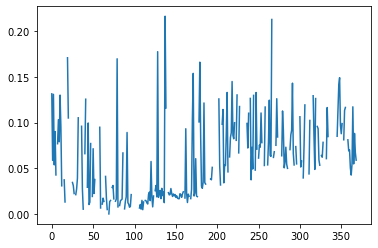

In [47]:
plt.plot(first_df['B17-865'])

## Trying to generate a first ever semi-raw dataset for manacapuru

In [50]:
import os
sys.path.append('../..')
from tsgen import TsGenerator

in_dir = 'D:\\S3\\L2_WFR_subset\\MANACAPURU'

tsgen = TsGenerator()

todo = tsgen.build_list_from_subset(in_dir)
todo_fullpath = [os.path.join(in_dir,csv) for csv in todo]
print(f'{todo[0]}\n\n{todo_fullpath[0]}')

S3A_OL_2_WFR____20160425T134227_20160425T134427_20171030T154612_0119_003_238______MR1_R_NT_002_subset.txt

D:\S3\L2_WFR_subset\MANACAPURU\S3A_OL_2_WFR____20160425T134227_20160425T134427_20171030T154612_0119_003_238______MR1_R_NT_002_subset.txt


In [55]:
datename = []
done_r = []
done_ir = []
total = len(todo_fullpath)
for n,img in enumerate(todo_fullpath):
    print(f'>>> Processing: {n+1} of {total} ... {img}')
    raw_df = pd.read_csv(img, sep='\t', skiprows=1)
    date_name = os.path.basename(img).split('____')[1].split('_')[0]
    # Delete indexes for which Oa01_reflectance is saturated:
    indexNames = raw_df[raw_df['Oa01_reflectance:float'] == 1.0000184].index
    raw_df.drop(indexNames, inplace=True)
    ir = raw_df['Oa17_reflectance:float']
    r = raw_df['Oa08_reflectance:float']
    ir_mean = np.mean(ir)
    r_mean = np.mean(r)
    done_r.append(r_mean)
    done_ir.append(ir_mean)
    datename.append(date_name)

>>> Processing: 1 of 942 ... D:\S3\L2_WFR_subset\MANACAPURU\S3A_OL_2_WFR____20160425T134227_20160425T134427_20171030T154612_0119_003_238______MR1_R_NT_002_subset.txt
>>> Processing: 2 of 942 ... D:\S3\L2_WFR_subset\MANACAPURU\S3A_OL_2_WFR____20160428T140436_20160428T140636_20171030T201052_0119_003_281______MR1_R_NT_002_subset.txt
>>> Processing: 3 of 942 ... D:\S3\L2_WFR_subset\MANACAPURU\S3A_OL_2_WFR____20160429T133846_20160429T134046_20171030T212723_0119_003_295______MR1_R_NT_002_subset.txt
>>> Processing: 4 of 942 ... D:\S3\L2_WFR_subset\MANACAPURU\S3A_OL_2_WFR____20160502T140055_20160502T140255_20171031T025227_0119_003_338______MR1_R_NT_002_subset.txt
>>> Processing: 5 of 942 ... D:\S3\L2_WFR_subset\MANACAPURU\S3A_OL_2_WFR____20160503T133505_20160503T133705_20171031T043213_0119_003_352______MR1_R_NT_002_subset.txt
>>> Processing: 6 of 942 ... D:\S3\L2_WFR_subset\MANACAPURU\S3A_OL_2_WFR____20160506T135714_20160506T135914_20171031T100025_0119_004_010______MR1_R_NT_002_subset.txt
>>> 

In [56]:
raw_ts_df = pd.DataFrame(list(zip(datename, done_r, done_ir)), columns =['dt_str', 'mean_Oa08', 'mean_Oa17']) 

In [57]:
raw_ts_df.head()

,dt_str,mean_Oa08,mean_Oa17
0,20160425T134227,NaN,NaN
1,20160428T140436,NaN,NaN
2,20160429T133846,NaN,NaN
3,20160502T140055,0.05717,0.037609
4,20160503T133505,NaN,NaN


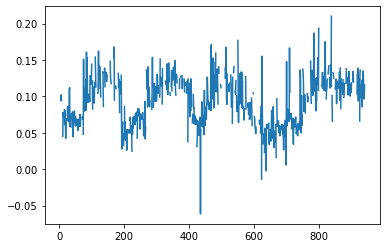

In [58]:
plt.plot(raw_ts_df['mean_Oa08'])

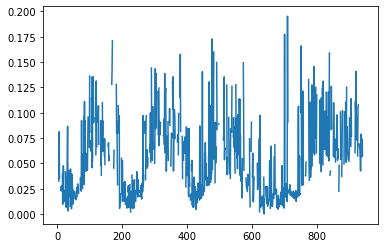

In [59]:
plt.plot(raw_ts_df['mean_Oa17'])

In [60]:
from datetime import datetime

In [63]:
raw_ts_df['py_date'] = [datetime.strptime(d, '%Y%m%dT%H%M%S') for d in raw_ts_df['dt_str']]

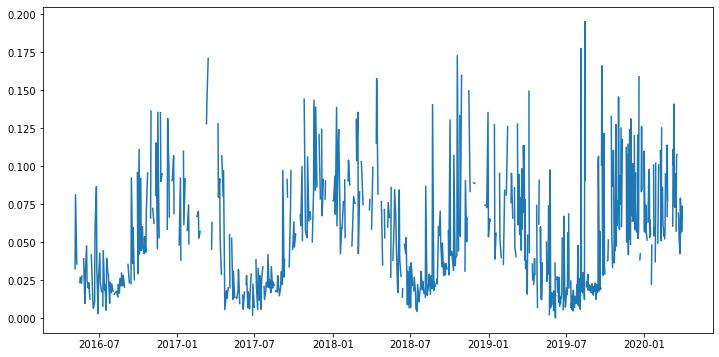

In [64]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(raw_ts_df['py_date'],raw_ts_df['mean_Oa17'])

In [65]:
s3_filter = pd.read_excel('D:\\processing\\win\\MANACAPURUv9b.xlsx')

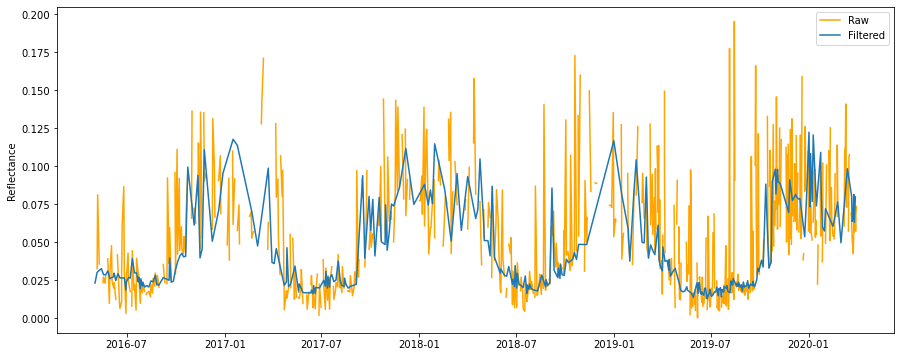

In [74]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(raw_ts_df['py_date'],raw_ts_df['mean_Oa17'],label='Raw',c='orange')
plt.plot(s3_filter['Datetime'],s3_filter['B17-865'],label='Filtered',c=u'#1f77b4')
plt.ylabel('Reflectance')
plt.legend()
plt.savefig('raw_vs_filtered.png', bbox_inches='tight')